# Which GPU to use

In [17]:
multiGPU = False
whichGPU = 1
 
# Select which GPU to use
if(multiGPU):
    from keras.utils.training_utils import multi_gpu_model
else:
    import os
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    # The GPU id to use, usually either "0" or "1"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# # Do other imports now...

# Load all the functions

In [18]:
%run -i 'arena.py'

# Plot bengio results - only mean results

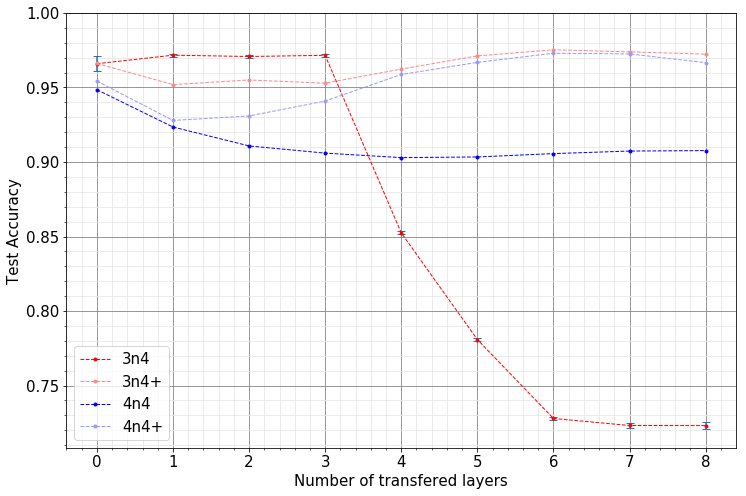

In [4]:
# plot Bengio 

######### load results
saveDir = 'bengioResults'

#3n4
resSaveFile = '3n4freeze-10runAverage'
acc3n4 = load_obj(saveDir,resSaveFile)
acc3n4err = [0.005,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.0022]

#3n4+
resSaveFile = '3n4nofreeze-10runAverage'
saveDir = 'bengioResults'
acc3n4plus = load_obj(saveDir,resSaveFile)

#4n4
resSaveFile = '4n4freeze-5runAverage'
acc4n4 = load_obj(saveDir,resSaveFile)
# acc3n4err = [0.005,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.0022]

#4n4+
# resSaveFile = '4n4nofreeze-10runAverage'
resSaveFile = '4n4nofreeze-5runAverage'
saveDir = 'bengioResults'
acc4n4plus = load_obj(saveDir,resSaveFile)


######### plot results
AnB = acc3n4
AnBplus = acc3n4plus
BnB = acc4n4
BnBplus = acc4n4plus

x = [i for i in range(len(AnB))]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
# ax.set_yscale('log')

#3n4
ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
ax.plot(x,AnB, '.--', label = '3n4', color = '#ff0000', linewidth = 1)


#3n4+
# ax.errorbar(x,AnBplus, yerr=0.005, fmt='none', capsize = 4)
ax.plot(x,AnBplus, '.--', label = '3n4+', color = '#ff8888', linewidth = 1)

#4n4
# ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
ax.plot(x[:len(BnB)],BnB, '.--', label = '4n4', color = '#0000ff', linewidth = 1)

#4n4+
# ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
ax.plot(x[:len(BnBplus)],BnBplus, '.--', label = '4n4+', color = '#9999ff', linewidth = 1)

#setup
yl = ax.get_ylim()
ax.set_ylim(yl[0], 1)
ax.set_xlabel("Number of transfered layers")
ax.set_ylabel("Test Accuracy")
ax.legend()
plt.minorticks_on()
ax.grid(b=True, which='major', color='0.5', linestyle='-')
ax.grid(b=True, which='minor', color='0.9', linestyle='-')
                

# Plot bengio results - fullRun results - auto calc error bounds

In [49]:
xFull = [[0.9521808053271059, 0.9592193682733443, 0.9589202537988933, 0.9497581410893619, 0.946441393531383, 0.9349295613938086, 0.9273335207892224, 0.9165715124027525, 0.9282198613642059, 0.9141451805485453], [0.9195867004089298, 0.9203426368531195, 0.9182655435611895, 0.924165922955561, 0.9087440044661471, 0.9116760598392926, 0.919438773223239, 0.9176807625382506, 0.9089722116946111, 0.8977436010287569], [0.9217379610497219, 0.9125562877202192, 0.9177936436134672, 0.9171090219280753, 0.9188059056770137, 0.9123052597692003, 0.9242804340828468, 0.9265894022192667, 0.925673720715055, 0.921387499949158], [0.9350461100854884, 0.9342445321956544, 0.9364524371307518, 0.940469291864917, 0.9395140816087778, 0.940754550900497, 0.9480628873920554, 0.9427582918691378, 0.9402614602818515, 0.945601916940962], [0.9557881095882255, 0.9594487980409209, 0.9589080284117999, 0.9621176000748366, 0.9630789230247411, 0.962064623397189, 0.9619774156348831, 0.9603078352507787, 0.9621620189818055, 0.9632040294874883], [0.9704019299813751, 0.9716293588597962, 0.971290715633272, 0.9670175352806729, 0.9704194530360292, 0.9715441886621758, 0.9722194375505386, 0.9739921187003598, 0.9725022515088165, 0.9721790937730381], [0.9762961966822729, 0.977575379700152, 0.9756506962358032, 0.9786235028994543, 0.9761446018805074, 0.9773732532977982, 0.9764803925164329, 0.9786540663675521, 0.9790546515559423, 0.978106369019093]]
xFullConv =  convertFullToMeanError(xFull)
x = [0.9387719598518622, 0.9146616216569097, 0.9198239136724025, 0.9403165560270093, 0.9609057381892668, 0.9713196082986075, 0.9773959110155008]
xFullConv[:,0] - x

array([0., 0., 0., 0., 0., 0., 0.])

9
2
9
9


AssertionError: 

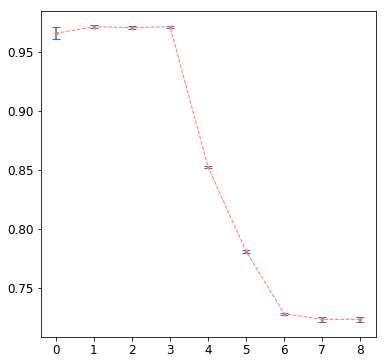

In [45]:
# plot Bengio 

import matplotlib


def plotIt():
    ######### load results
    saveDir = 'bengioResults'

    #3n4
    resSaveFile = '3n4freeze-10runAverage'
    acc3n4 = load_obj(saveDir,resSaveFile)
    acc3n4err = [0.005,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.0022]

    #3n4+
    #old
#     resSaveFile = '3n4nofreeze-10runAverage'
#     acc3n4plus = load_obj(saveDir,resSaveFile)
    #new
    full3n4plusFile = '3n4nofreeze-10runAverage-10epochs-10runAverage-10epochs-allRuns'
    full3n4plus = load_obj(saveDir, full3n4plusFile)
    # full4n4plus = np.array(full4n4plus)[:,:5]
    full3n4plusMeanAndError = convertFullToMeanError(full3n4plus)
    acc3n4plus = full3n4plusMeanAndError[:,0]
    acc3n4plusError = full3n4plusMeanAndError[:,1]
    

    #4n4
    full4n4File = '4n4freeze-5runAverage_allRuns'
    full4n4 = load_obj(saveDir, full4n4File)
    full4n4MeanAndError = convertFullToMeanError(full4n4)
    acc4n4 = full4n4MeanAndError[:,0]
    acc4n4Error = full4n4MeanAndError[:,1]

    #4n4+
    full4n4plusFile = '4n4nofreeze-5runAverage_allRuns'
    full4n4plus = load_obj(saveDir, full4n4plusFile)
    # full4n4plus = np.array(full4n4plus)[:,:5]
    full4n4plusMeanAndError = convertFullToMeanError(full4n4plus)
    acc4n4plus = full4n4plusMeanAndError[:,0]
    acc4n4plusError = full4n4plusMeanAndError[:,1]

    ######### plot results
    AnB = acc3n4
    AnBplus = acc3n4plus
    BnB = acc4n4
    BnBplus = acc4n4plus

    print(len(AnB))
    print(len(AnBplus))
    print(len(BnB))
    print(len(BnBplus))
    x = [i for i in range(len(AnB))]

    fig = plt.figure(figsize=(xSize,ySize))
    ax = fig.add_subplot(111)
    # ax.set_yscale('log')


    #3n4
    ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
    ax.plot(x,AnB, '.--', label = '3n4', color = color3n4, linewidth = 1)


    #3n4+
    # ax.errorbar(x,AnBplus, yerr=0.005, fmt='none', capsize = 4)
#     ax.plot(x,AnBplus, '.--', label = '3n4+', color = color3n4plus, linewidth = 1)
    ax.errorbar(x,AnBplus, acc3n4plusError, fmt='none', capsize = 4, color = color3n4plus)
    ax.plot(x[:len(AnBplus)],AnBplus, '.--', label = '4n4+', color = color3n4plus, linewidth = 1)

    #4n4
    ax.errorbar(x[:len(BnB)],BnB, acc4n4Error, fmt='none', capsize = 4, color = color4n4)
    ax.plot(x[:len(BnB)],BnB, '.--', label = '4n4', color = color4n4, linewidth = 1)

    #4n4+
    ax.errorbar(x,BnBplus, acc4n4plusError, fmt='none', capsize = 4, color = color4n4plus)
    ax.plot(x[:len(BnBplus)],BnBplus, '.--', label = '4n4+', color = color4n4plus, linewidth = 1)

    #setup
    yl = ax.get_ylim()
    ax.set_ylim(yl[0], 1)
    ax.set_xlabel("Number of transfered layers")
    ax.set_ylabel("Test Accuracy")
    ax.legend()
    plt.minorticks_on()
    ax.grid(b=True, which='major', color='0.5', linestyle='-')
    ax.grid(b=True, which='minor', color='0.9', linestyle='-')

    # set fontsize
    matplotlib.rc('font', size=fontSize)
    matplotlib.rc('axes', titlesize=fontSize)

############################### parameters
# xSize = 10
# ySize = 4.5
xSize = 6
ySize = 6
fontSize = 12
######### colors
color3n4plus = '#ff0000'
color3n4 = '#ff7777'
color4n4plus = '#0000ff'
color4n4 = '#7777ff'

plotIt()



# Calc confidence intervals


In [58]:
def calcStats(measurements):
    μ = np.mean(measurements)
    σ = np.std(measurements, ddof=1)
    n = len(measurements)
    ste = σ/np.sqrt(n-1)
    error = 1.96 * ste
    return [μ, error] 
    
def convertFullToMeanError(allResults):
    return np.array([calcStats(m) for m in allResults])
    
measurements = np.array(convertFullToMeanError(f4n4plus))
    
print(measurements)

[[9.54291396e-01 1.07028476e-02]
 [9.27887901e-01 7.46899369e-03]
 [9.30852395e-01 4.20606000e-03]
 [9.40883814e-01 4.11693100e-03]
 [9.58699137e-01 1.49559208e-03]
 [9.66828042e-01 1.87278026e-03]
 [9.72938779e-01 1.22907008e-03]
 [9.72502333e-01 6.26992072e-04]
 [9.66625589e-01 3.32091845e-03]]


# Plot tensorboard in Matplotlib example code

In [ ]:
import numpy as np
from tensorflow.python.summary.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_tensorflow_log(path):

    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_acc = EventAccumulator(path, tf_size_guidance)
    event_acc.Reload()

    # Show all tags in the log file
    #print(event_acc.Tags())

    training_accuracies =   event_acc.Scalars('training-accuracy')
    validation_accuracies = event_acc.Scalars('validation_accuracy')

    steps = 10
    x = np.arange(steps)
    y = np.zeros([steps, 2])

    for i in xrange(steps):
        y[i, 0] = training_accuracies[i][2] # value
        y[i, 1] = validation_accuracies[i][2]

    plt.plot(x, y[:,0], label='training accuracy')
    plt.plot(x, y[:,1], label='validation accuracy')

    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title("Training Progress")
    plt.legend(loc='upper right', frameon=True)
    plt.show()


if __name__ == '__main__':
    log_file = "./logs/events.out.tfevents.1456909092.DTA16004"
    plot_tensorflow_log(log_file)